- Interpolations lineaires et non lineaire
- Optimization / minimization
- Transformation de Fourier


# PANDAS

[video 18](https://www.youtube.com/watch?v=qHRLG5hsW9I&t=2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
btchisto = pd.read_csv('./assets/crypto/BTC-EUR.csv')
btchisto.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot:>

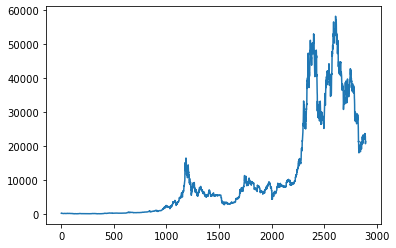

In [3]:
btchisto['Close'].plot()

In [4]:
btchisto['Close'].max()

58305.039063

__N.B : par defaut, pandas ne reconnait pas la serie temporelle et utilise un index incremental standard. On va devoir modifier notre read_csv pour ca__

In [5]:
btchisto = pd.read_csv('./assets/crypto/BTC-EUR.csv', index_col='Date', parse_dates=True) #parse_dates=True / Indique que notre index colonne est bien en date
btchisto.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


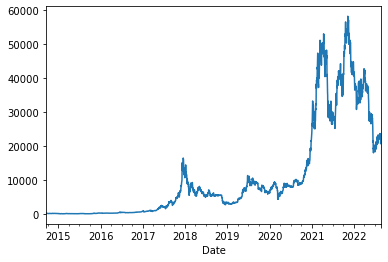

In [6]:
btchisto['Close'].plot()
plt.show()

__Creer un index temporel va faciliter l'usage des fonctions associees__

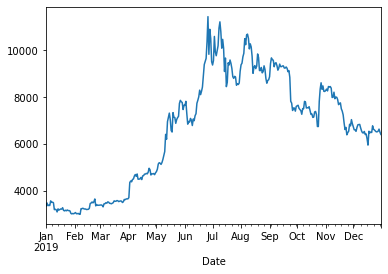

In [7]:
btchisto['2019']['Close'].plot()
plt.show()

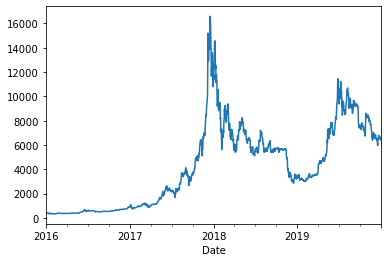

In [8]:
btchisto['2016':'2019']['Close'].plot()
plt.show()

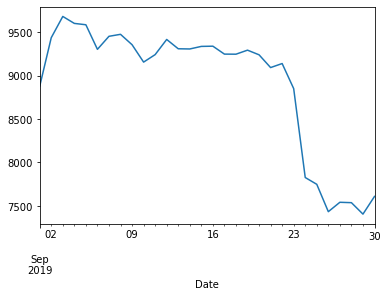

In [9]:
btchisto['2019-09']['Close'].plot()
plt.show()

L'indexing de series temporelles fonctionnent aussi bien avec et sans la methode "loc"

In [10]:
btchisto.loc['2016':'2019', 'Close']

Date
2016-01-01     400.012909
2016-01-02     399.187683
2016-01-03     396.360016
2016-01-04     400.194977
2016-01-05     401.898010
                 ...     
2019-12-27    6523.747070
2019-12-28    6548.715820
2019-12-29    6638.048340
2019-12-30    6510.733887
2019-12-31    6411.460449
Name: Close, Length: 1461, dtype: float64

# Resample

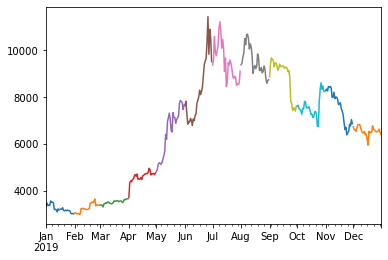

In [11]:
btchisto.loc['2019', 'Close'].resample('M').plot()
plt.show()

En faisant le resample, qu'on combine a une fonction mathematique, on peut obtenir la moyenne par mois

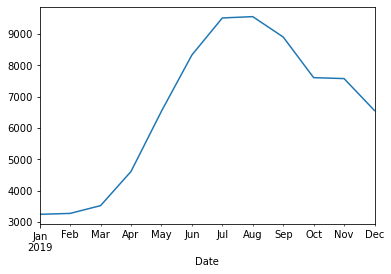

In [12]:
# Evolution du bitcoin en 2019 en faisant la moyenne par mois
btchisto.loc['2019', 'Close'].resample('M').mean().plot()
plt.show()

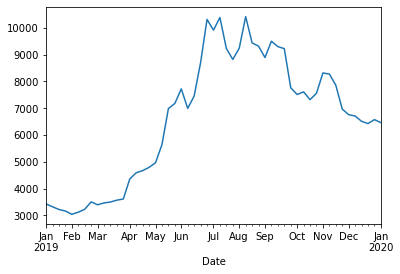

In [13]:
# Evolution du bitcoin en 2019 en faisant la moyenne par semaine
btchisto.loc['2019', 'Close'].resample('W').mean().plot() # Possibilite de faire '2W'
plt.show()

#### Etudier la volatilite du Bitcoin grace a l'ecart type

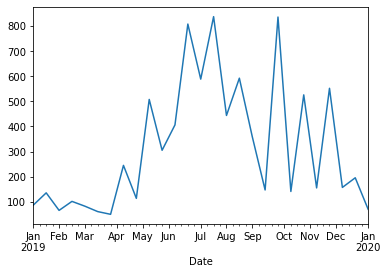

In [14]:
# Pour etudier la volatilite on peut etudier l'ecart type du BTC
btchisto.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

Une autre maniere d'etudier la volatilite est avec la fonction diff

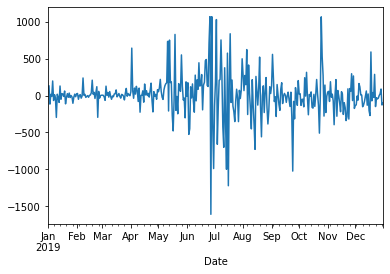

In [15]:
btchisto['2019']['Close'].diff().plot()
plt.show()

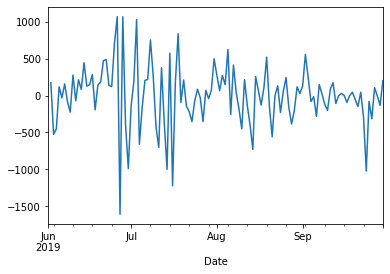

In [16]:
btchisto['2019-06':'2019-09']['Close'].diff().plot()
plt.show()

Ce genre de variation et de volatilite rend caduc les techniques d'investissement comme celle de la tortue (voir exercice : investissement ou vente en fonction des max ou min). Avec tant de volatilite on risque d'acheter avant un crash

Dans la pratique, il est interessant d'afficher toutes ces courbes sur un meme graphique

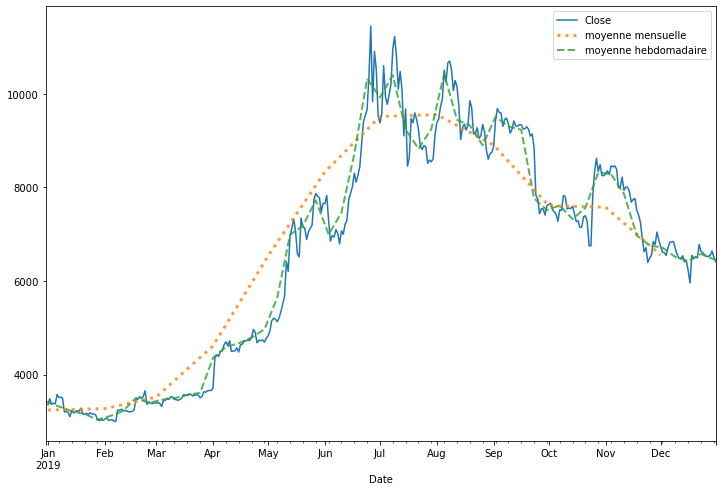

In [17]:
plt.figure(figsize=(12, 8))
btchisto.loc['2019', 'Close'].plot()
btchisto.loc['2019', 'Close'].resample('M').mean().plot(label = 'moyenne mensuelle', lw = 3, ls = ':', alpha = 0.8)
btchisto.loc['2019', 'Close'].resample('W').mean().plot(label = 'moyenne hebdomadaire', lw = 2, ls = '--', alpha = 0.8)
plt.legend()
plt.show()

## Aggregate
Permet de rassembler, dans un seul tableau, plusieurs statistiques qu'on aimerait bien faire sur des elements resamples

In [18]:
btchisto.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).head()

,mean,std,min,max
Date,,,,
2019-01-06,3422.916626,86.768296,3353.505859,3572.601807
2019-01-13,3317.593401,180.066248,3100.221680,3518.607910
2019-01-20,3216.173340,36.646566,3168.373535,3280.021484
2019-01-27,3157.861154,15.218334,3140.374756,3183.176025
2019-02-03,3035.448347,19.472269,3015.454102,3073.150146


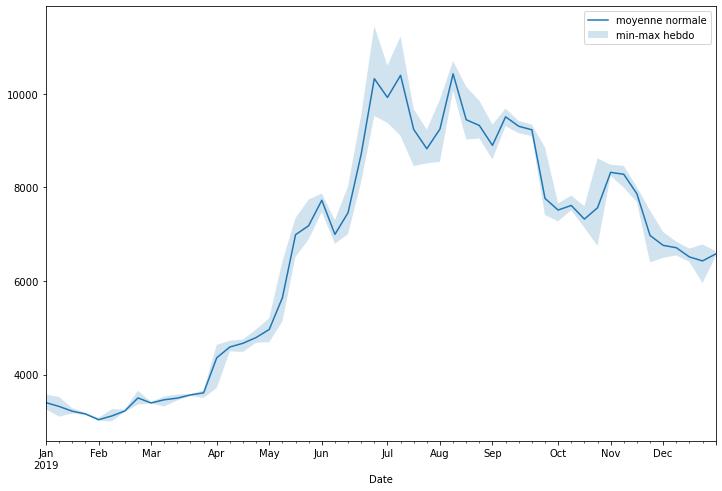

In [19]:
m = btchisto['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['2019']['mean'].plot(label = 'moyenne normale')
plt.fill_between(m['2019'].index, m['2019']['max'], m['2019']['min'], alpha = 0.2, label = 'min-max hebdo')

plt.legend()
plt.show()

# Moving Average

On fait une moyenne glissante sur une fenetre de valeur.

Exemple :
- Moyenne des 7 jours precedent
- On avance de 1 jour, puis moyenne des 7 jours precedents

Dans pandas : pd.rolling(window)

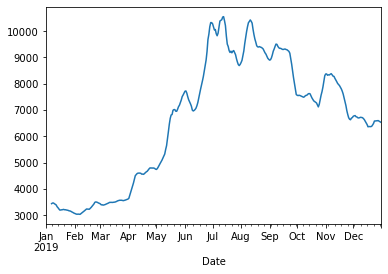

In [20]:
btchisto.loc['2019', 'Close'].rolling(window=7).mean().plot()
plt.show()

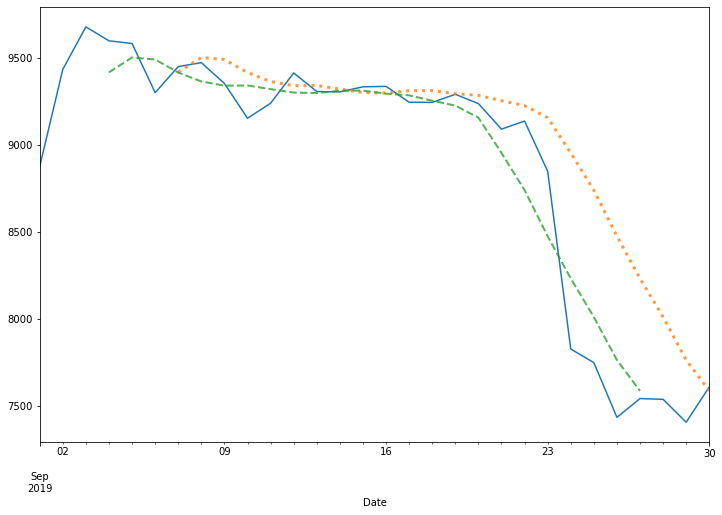

In [21]:
plt.figure(figsize=(12, 8))
btchisto.loc['2019-09', 'Close'].plot(label = 'Valeur du BTC a cloture')
btchisto.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label = 'Moyenne glissante sur une semaine', alpha = 0.8, lw = 3, ls = ':')
# Si on veut centrer la moyenne glissante
btchisto.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label = 'Moyenne glissante sur une semaine (centered)', alpha = 0.8, lw = 2, ls = '--')
plt.show()


## Exponential weighted Function (Moyenne mobile exponentielle)

La valeur Xt est lissee par un coefficient Alpha, entre 0 et 1. 

Les valeurs (Xt) perdent peu a peu du poids avec le temps

Fonction EWM de pandas

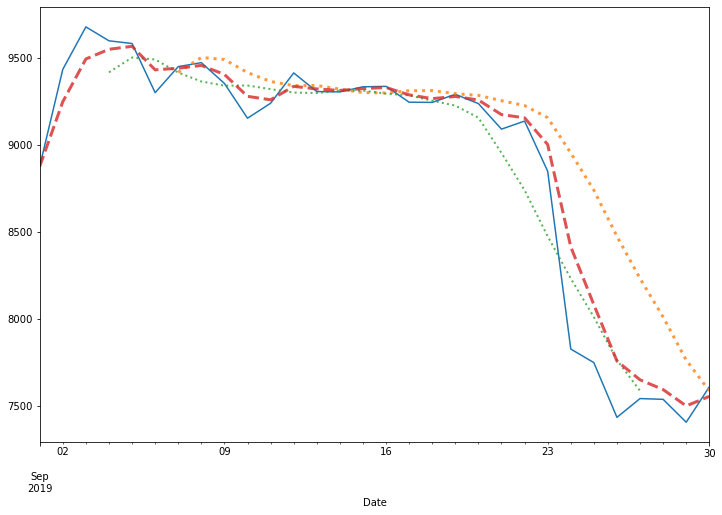

In [22]:
plt.figure(figsize=(12, 8))
btchisto.loc['2019-09', 'Close'].plot(label = 'Valeur du BTC a cloture')
btchisto.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label = 'Moyenne glissante sur une semaine', alpha = 0.8, lw = 3, ls = ':')
# Si on veut centrer la moyenne glissante
btchisto.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label = 'Moyenne glissante sur une semaine (centered)', alpha = 0.8, lw = 2, ls = ':')
btchisto.loc['2019-09', 'Close'].ewm(alpha=0.5).mean().plot(label = 'EWN', alpha = 0.8, lw = 3, ls = '--')
plt.show()

La fonction EWN lisse, mais suit mieux la courbe authentique du bitcoin que nos moving average d'avant.

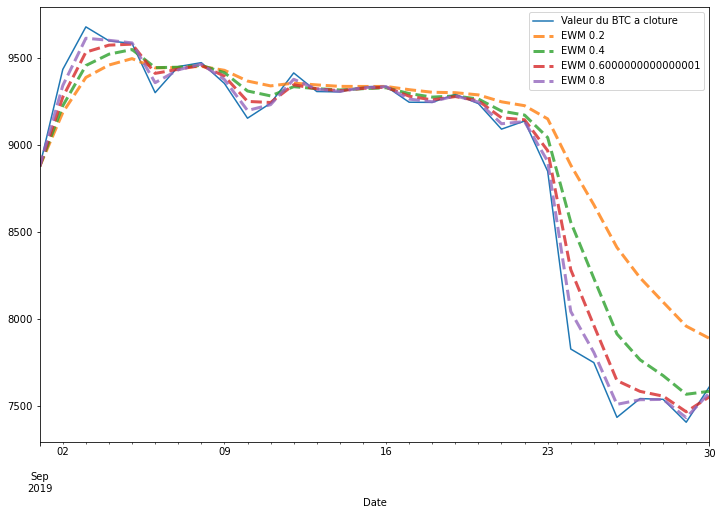

In [23]:
plt.figure(figsize=(12, 8))
btchisto.loc['2019-09', 'Close'].plot(label = 'Valeur du BTC a cloture')
for i in np.arange(0.2, 1, 0.2) :
    btchisto.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label = f'EWM {i}', alpha = 0.8, lw = 3, ls = '--')
plt.legend()
plt.show()

# Assembler des dataframes

- __inner__ : On assemble les DTF sur les index qu'ils ont en commun
- __outer__ : On assemble les DTF sur tous les index possibles, quitte a mettre des NaN quand on n'a pas les valeurs

In [24]:
ethhisto = pd.read_csv('./assets/crypto/ETH-EUR.csv', index_col='Date', parse_dates=True)
ethhisto.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


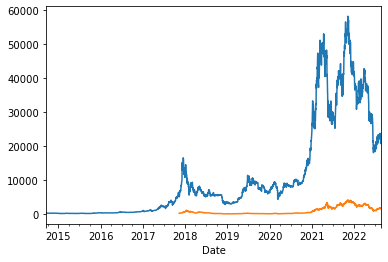

In [25]:
plt.figure()
btchisto['Close'].plot(label = 'BTC')
ethhisto['Close'].plot(label = 'ETH')
plt.show()

__Probleme : les deux datasets qu'on va vouloir assembler n'on pas la meme taille__

Si on regarde sur l'annee 2019, on voit que les tendances sont similaires

In [26]:
mergeddtf = pd.merge(btchisto, ethhisto, on='Date', how='inner') # How : Inner = intersection / Outer = full / left : le premier ensemble est la reference / right : le dernier ensemble est la reference
mergeddtf.head()

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


In [27]:
btceth = pd.merge(btchisto, ethhisto, on='Date', how='inner', suffixes=('_btc', '_eth'))
btceth.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

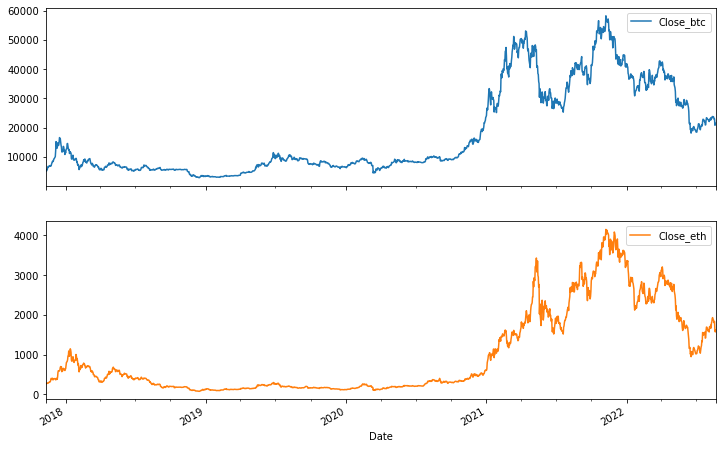

In [28]:
btceth[['Close_btc', 'Close_eth']].plot(subplots = True, figsize = (12, 8)) # On fait des subplots pour faiire fi de la difference d'echelle

__Les deux monnaies semblent correlees__

On va donc calculer cette correlation

In [29]:
btceth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.930773
Close_eth,0.930773,1.000000


In [30]:
correl = btceth[['Close_btc', 'Close_eth']].corr()

<AxesSubplot:>

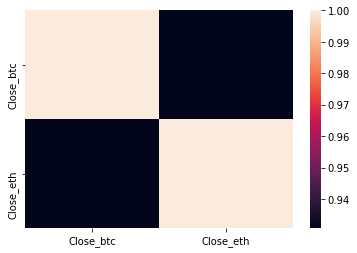

In [31]:
import seaborn as sns
sns.heatmap(correl)

# Exercice : Trading strategies

Strategie de la tortue pour savoir quand acheter ou vendre du bitcoin en fonction de ses variations et de ses valeurs des 28 derniers jours.

1. Utiliser rolling() pour calculer : max & min ces 28 derniers jours
2. Boolean indexing : Si Close > max28 alors Buy 1 / Si Close < min28 alors Sell -1

Initialiser les colonnes sell et buy avec des 0 

bitcoin['Buy'] = np.zeros(len(bitcoin))

bitcoin['Sell'] = np.zeros(len(bitcoin))

Objectif : obtenir [ca](https://youtu.be/qHRLG5hsW9I?t=1092)

Bonus : utiliser la methode shift pour prendre vos decisions, avec un jour d'avance

__N.B : J'etais oblige d'utiliser shift, sinon si la valeur actuelle etait le max, Buy restait a Zero__

In [32]:
bitcoin = pd.read_csv('./assets/crypto/BTC-EUR.csv', index_col='Date', parse_dates=True)

In [33]:
bitcoin['minser'] = bitcoin['Close'].rolling(window=28).min()
bitcoin['maxser'] = bitcoin['Close'].rolling(window=28).max()
bitcoin['Buy'] = np.zeros(bitcoin.shape[0])
bitcoin['Sell'] = np.zeros(bitcoin.shape[0])
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,minser,maxser,Buy,Sell
Date,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,NaN,NaN,0.0,0.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,NaN,NaN,0.0,0.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,NaN,NaN,0.0,0.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,0.0,0.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,0.0,0.0


In [34]:
bitcoin.loc[bitcoin['Close'] > bitcoin['maxser'].shift(periods=1), 'Buy'] = 1.0
bitcoin.loc[bitcoin['Close'] < bitcoin['minser'].shift(periods=1), 'Sell'] = -1.0

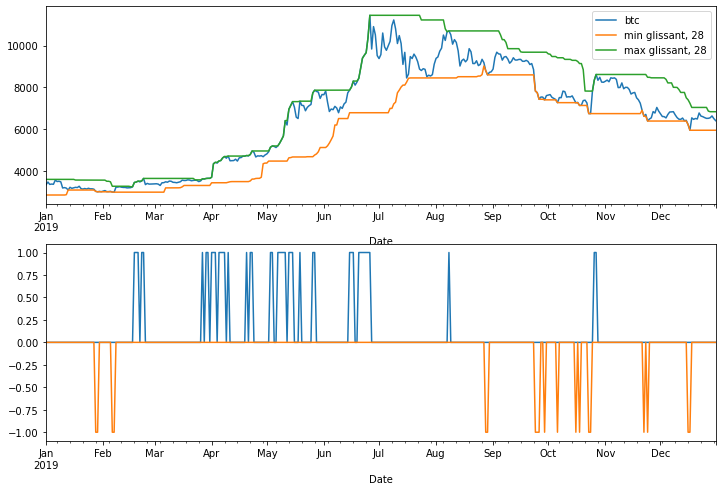

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
bitcoin['2019']['Close'].plot(label = 'btc')
bitcoin['2019']['minser'].plot(label = 'min glissant, 28')
bitcoin['2019']['maxser'].plot(label = 'max glissant, 28')
plt.legend()
plt.subplot(2, 1, 2)
bitcoin['2019']['Buy'].plot(label = 'Buy')
bitcoin['2019']['Sell'].plot(label = 'Sell')
plt.show()

# Correction
Il utilise la methode OOP de matplotlib pour partager un axe x

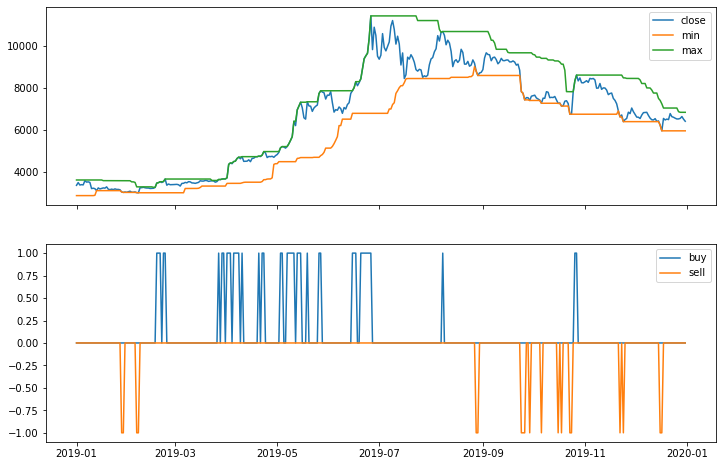

In [37]:
start = '2019'
end = '2019'

fig, ax = plt.subplots(2, figsize = (12, 8), sharex = True)
ax[0].plot(bitcoin['Close'][start:end])
ax[0].plot(bitcoin['minser'][start : end])
ax[0].plot(bitcoin['maxser'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(bitcoin['Buy'][start:end])
ax[1].plot(bitcoin['Sell'][start:end])
ax[1].legend(['buy', 'sell'])
plt.show()